<a href="https://colab.research.google.com/github/mulkihakim/PCVK_Ganjil_2024/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tugas Praktikum Morfologi

1. import folder yang ada di drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

3. Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element
Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
morphology.png)


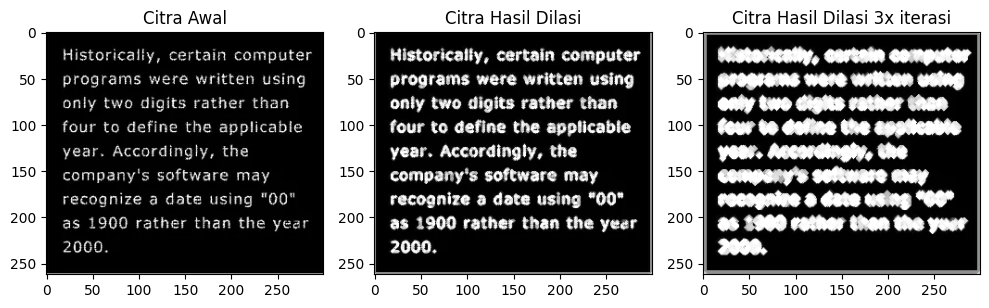

In [4]:
# 3 (Structuring Element Dilation without library)

img_path = '/content/drive/MyDrive/Kuliah polinema/sem 5/PCVK/Images/morphology.png'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

def dilation_with_iterations(image, iterations=1):
    # Define a 3x3 cross-shaped structuring element
    kernel = np.array([[0, 1, 0],
                       [1, 1, 1],
                       [0, 1, 0]], dtype=np.uint8)

    # Initialize the image to be dilated
    dilated_image = image.copy()

    # Perform dilation for the specified number of iterations
    for _ in range(iterations):
        # Get dimensions
        img_height, img_width = dilated_image.shape
        output_image = np.zeros_like(dilated_image)

        # Pad the image to manage border effects
        padded_image = np.pad(dilated_image, pad_width=1, mode='constant', constant_values=0)

        # Iterate through image pixels (excluding padded borders)
        for i in range(1, img_height + 1):
            for j in range(1, img_width + 1):
                # Perform dilation by considering the neighborhood and kernel
                max_value = np.max(padded_image[i-1:i+2, j-1:j+2] * kernel)
                output_image[i-1, j-1] = max_value

        # Update the dilated image to be the result of this iteration
        dilated_image = output_image

    return dilated_image

# Perform dilation
dilated_image = dilation_with_iterations(img, 1)
dilated1_image = dilation_with_iterations(img, 3)

# Display original and dilation side by side
plt.figure(figsize=(10,5))

# Display original image
plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title('Citra Awal')
plt.axis('on')

# Display dilated image 1x iterations
plt.subplot(132)
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Dilasi')
plt.axis('on')

# Display dilated image 3x iterations
plt.subplot(133)
plt.imshow(dilated1_image, cmap='gray')
plt.title('Citra Hasil Dilasi 3x iterasi')
plt.axis('on')

plt.tight_layout()
plt.show()

4. Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED)
berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
morphology.png, dan cetak Structuring Element-nya)


Structuring Element (Cross 3x3):
 [[0 1 0]
 [1 1 1]
 [0 1 0]]


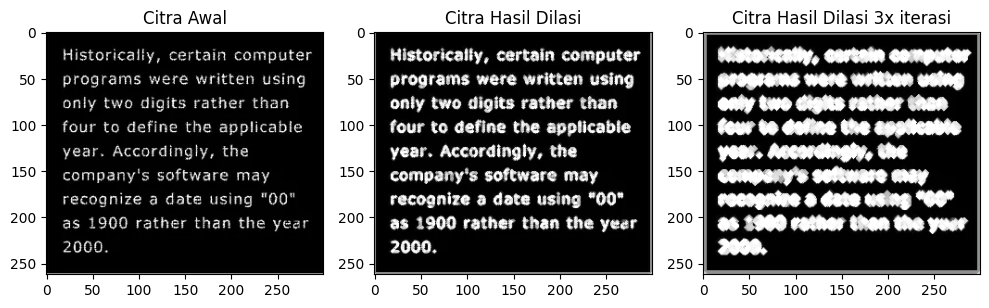

In [5]:
# 4 (Structuring Element Dilation with library (cv2.dilate))

# Load the image again in grayscale
image_path = '/content/drive/MyDrive/Kuliah polinema/sem 5/PCVK/Images/morphology.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


# Create a 3x3 cross-shaped structuring element using OpenCV
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

# Apply dilation using OpenCV's morphology functions
dilated_image_cv = cv2.dilate(image, kernel, iterations=1)
dilated1_image_cv = cv2.dilate(image, kernel, iterations=3)

# Print the structuring element
print("Structuring Element (Cross 3x3):\n", kernel)

# Display original and dilation side by side
plt.figure(figsize=(10,5))

# Display original image
plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('on')

# Display dilated image 1x iterations
plt.subplot(132)
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Dilasi')
plt.axis('on')

# Display dilated image 3x iterations
plt.subplot(133)
plt.imshow(dilated1_image, cmap='gray')
plt.title('Citra Hasil Dilasi 3x iterasi')
plt.axis('on')

plt.tight_layout()
plt.show()

5. Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element
Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
j.png)

Text(0.5, 1.0, 'Citra Hasil Erosi')

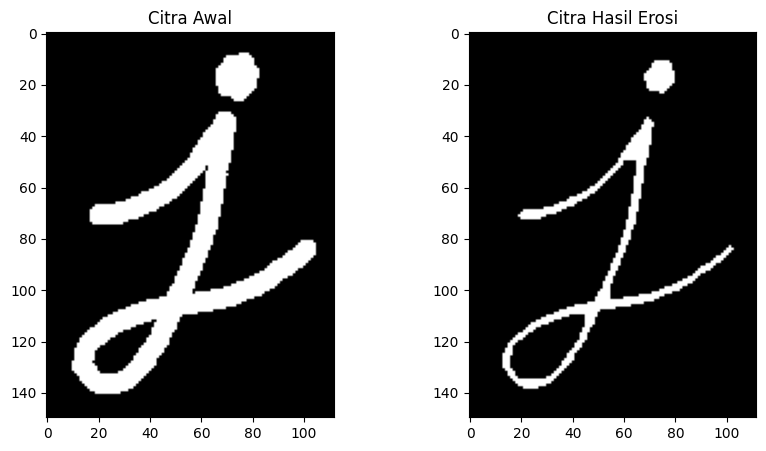

In [6]:
# 5 (Structuring Element Erosion without library)

img_path = '/content/drive/MyDrive/Kuliah polinema/sem 5/PCVK/Images/j.png'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Get image dimensions
height, width = img.shape
erosion_image = np.zeros(img.shape, img.dtype)
se_size = 5
se_half = se_size // 2

for i in range(se_size // 2, height - se_size // 2):
    for j in range(se_size // 2, width - se_size // 2):
        roi = img[i - se_size // 2:i + se_size // 2 + 1, j - se_size // 2:j + se_size // 2 + 1]
        erosion_image[i, j] = np.min(roi)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Citra Awal')
plt.subplot(1, 2, 2)
plt.imshow(erosion_image, cmap='gray')
plt.title('Citra Hasil Erosi')

6. Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk
square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga
menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

Text(0.5, 1.0, 'After')

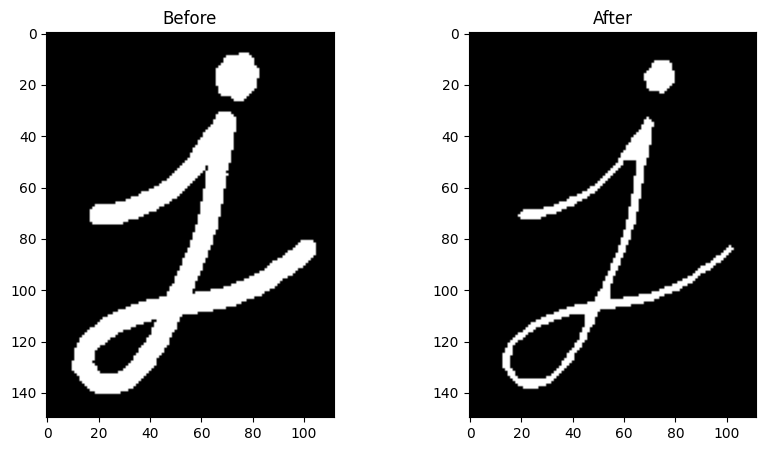

In [7]:
# 6 (Structuring Element Erosion with library (erode))
image = cv2.imread('/content/drive/MyDrive/Kuliah polinema/sem 5/PCVK/Images/j.png', cv2.IMREAD_GRAYSCALE)
erosion_image = np.zeros(image.shape, image.dtype)
se = np.ones((5, 5), dtype=np.uint8)

erosion_image = cv2.erode(image, se)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Before')
plt.subplot(1, 2, 2)
plt.imshow(erosion_image, cmap='gray')
plt.title('After')

7. Buatlah program implementasi operasi opening dengan Structuring Element
berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
fingerprint.png)

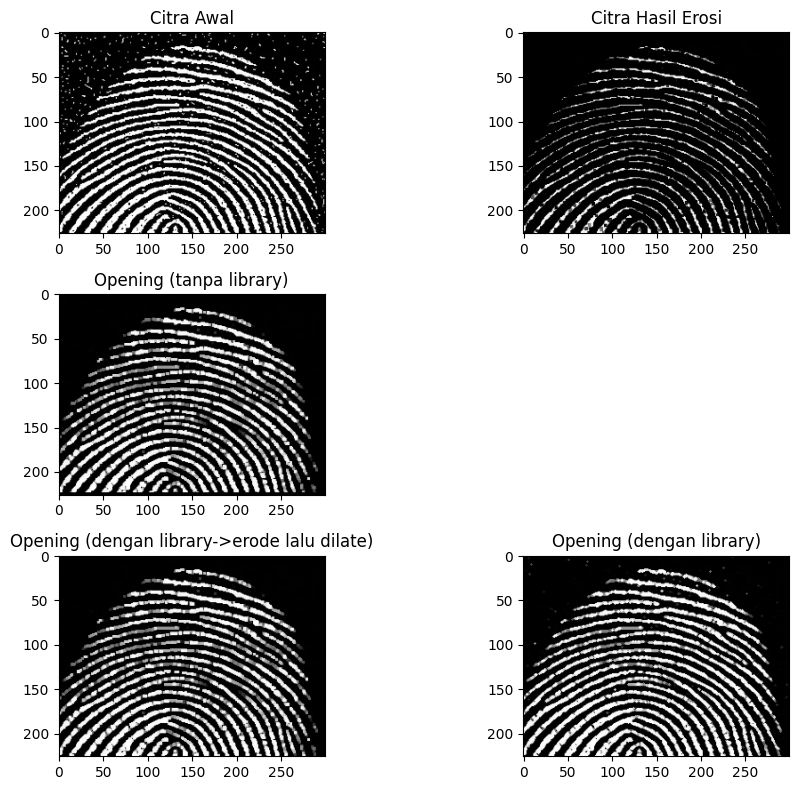

In [8]:
# 7 (Structuring Element Opening without library)

img_path = '/content/drive/MyDrive/Kuliah polinema/sem 5/PCVK/Images/fingerprint.png'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

erode = np.zeros(img.shape, img.dtype)
opening = np.zeros(img.shape, img.dtype)
se = np.ones((3, 3), dtype=np.uint8) #kernel

height, width = img.shape
se_size = 3
se_half = se_size // 2

for i in range(se_half, height - se_half):
    for j in range(se_half, width - se_half):
        roi = img[i - se_half:i + se_half + 1, j - se_half:j + se_half + 1]
        erode[i, j] = np.min(roi)

for y in range(len(se) // 2, img.shape[0] - len(se)):
  for x in range(len(se[0]) // 2, img.shape[1] - len(se)):
    maksimum = 0
    for i in range(len(se)):
      for j in range(len(se[0])):
        if(se[i][j] == 1):
          nilai_piksel = erode[y + i - len(se) // 2, x + j - len(se[0]) // 2]
          maksimum = max(maksimum, nilai_piksel)
    opening[y, x] = maksimum

# Structuring Element opening with library from OpenCV
erode = cv2.erode(img, se)
opened_image_cv = cv2.dilate(erode, se)

# or
opened1_image_cv = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)



plt.figure(figsize=(10, 8))
plt.subplot(3, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Citra Awal')
plt.subplot(3, 2, 2)
plt.imshow(erode, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.subplot(3, 2, 3)
plt.imshow(opening, cmap='gray')
plt.title('Opening (tanpa library)')
plt.subplot(3, 2, 5)
plt.imshow(opened_image_cv, cmap='gray')
plt.title('Opening (dengan library->erode lalu dilate)')
plt.subplot(3, 2, 6)
plt.imshow(opened1_image_cv, cmap='gray')
plt.title('Opening (dengan library)')

plt.tight_layout()
plt.show()

8. Buatlah program implementasi operasi closing dengan Structuring Element berbentuk
square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
fingerprint.png)

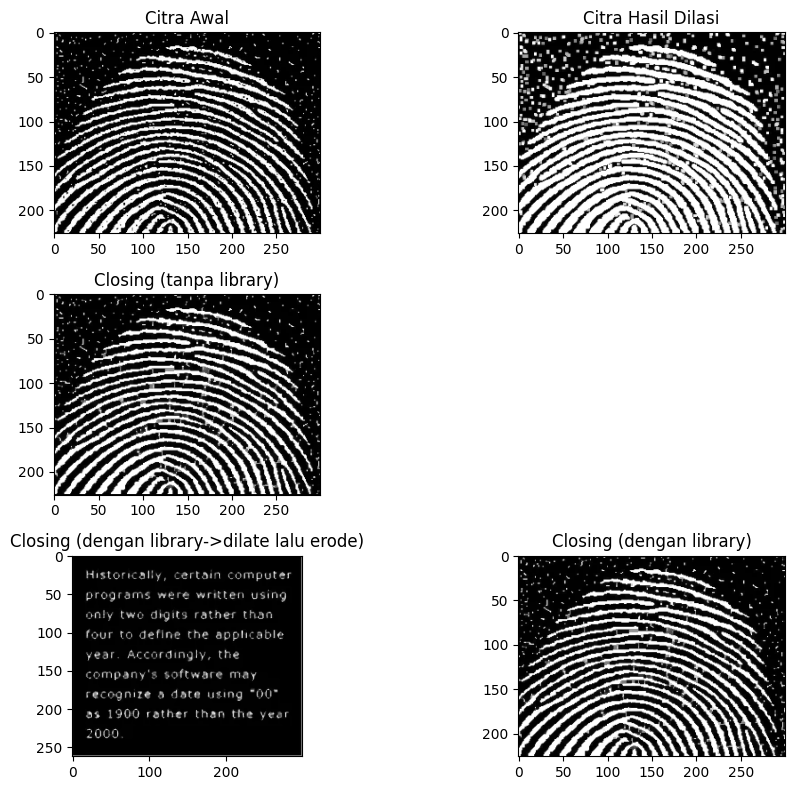

In [9]:
# 8. (Structuring Element Closing without library)

image_path = '/content/drive/MyDrive/Kuliah polinema/sem 5/PCVK/Images/fingerprint.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
kernel = np.ones((3, 3), dtype=np.uint8)

def dilation(image):
    # Define a 3x3 square-shaped structuring element
    height, width = image.shape
    output_image = np.zeros_like(image)

    # Pad the image to manage border effects
    padded_image = np.pad(image, pad_width=1, mode='constant', constant_values=0)

    # Perform dilation
    for i in range(1, height + 1):
        for j in range(1, width + 1):
            roi = padded_image[i-1:i+2, j-1:j+2]
            output_image[i-1, j-1] = np.max(roi * kernel)
            dilate = output_image

    return dilate

def erosion(image):
    # Define a 3x3 square-shaped structuring element
    height, width = image.shape
    output_image = np.zeros_like(image)

    # Pad the image to manage border effects
    padded_image = np.pad(image, pad_width=1, mode='constant', constant_values=0)

    # Perform erosion
    for i in range(1, height + 1):
        for j in range(1, width + 1):
            roi = padded_image[i-1:i+2, j-1:j+2]
            output_image[i-1, j-1] = np.min(roi * kernel)

    return output_image

def closing(image):
    # Perform closing by first dilating and then eroding
    dilate_image = dilation(image)
    closed_image = erosion(dilate_image)
    return closed_image

closed_image_manual = closing(image)

# Structured Element Closing with library from OpenCV
dilate_image = cv2.dilate(image, kernel)
closed_image_cv = cv2.erode(dilated_image, kernel)

# or
closed1_image_cv = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)


plt.figure(figsize=(10, 8))
plt.subplot(3, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Citra Awal')
plt.subplot(3, 2, 2)
plt.imshow(dilation(image), cmap='gray')
plt.title('Citra Hasil Dilasi')
plt.subplot(3, 2, 3)
plt.imshow(closed_image_manual, cmap='gray')
plt.title('Closing (tanpa library)')
plt.subplot(3, 2, 5)
plt.imshow(closed_image_cv, cmap='gray')
plt.title('Closing (dengan library->dilate lalu erode)')
plt.subplot(3, 2, 6)
plt.imshow(closed1_image_cv, cmap='gray')
plt.title('Closing (dengan library)')

plt.tight_layout()
plt.show()

9. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Cross 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan
gambar j.png)

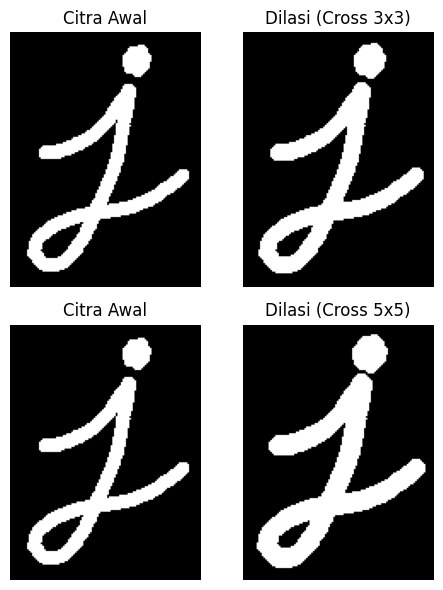

In [14]:
image = cv2.imread('/content/drive/MyDrive/Kuliah polinema/sem 5/PCVK/Images/j.png', cv2.IMREAD_GRAYSCALE)

# Define structuring elements
def create_cross_kernel(size):
    kernel = np.zeros((size, size), dtype=np.uint8)
    mid = size // 2
    kernel[mid, :] = 1  # Horizontal line
    kernel[:, mid] = 1  # Vertical line
    return kernel

# Create cross-shaped kernels
kernel_3x3 = create_cross_kernel(3)
kernel_5x5 = create_cross_kernel(5)

# Perform dilation
dilated_3x3 = cv2.dilate(image, kernel_3x3)
dilated_5x5 = cv2.dilate(image, kernel_5x5)

# Display results
plt.figure(figsize=(5, 6))
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(dilated_3x3, cmap='gray')
plt.title('Dilasi (Cross 3x3)')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(dilated_5x5, cmap='gray')
plt.title('Dilasi (Cross 5x5)')
plt.axis('off')

plt.tight_layout()
plt.show()

10.  Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Circular 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini:
(Gunakan gambar j.png)

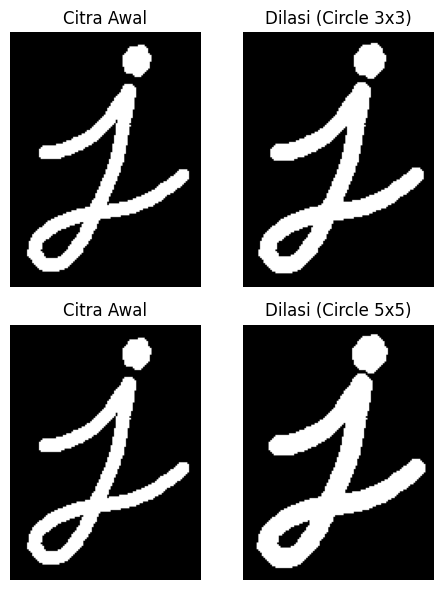

In [15]:
img = cv2.imread('/content/drive/MyDrive/Kuliah polinema/sem 5/PCVK/Images/j.png', cv2.IMREAD_GRAYSCALE)

kernel_3x3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
kernel_5x5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

dilate_3x3 = cv2.dilate(img, kernel_3x3)
dilate_5x5 = cv2.dilate(img, kernel_5x5)

plt.figure(figsize=(5, 6))
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(dilated_3x3, cmap='gray')
plt.title('Dilasi (Circle 3x3)')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(image, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(dilated_5x5, cmap='gray')
plt.title('Dilasi (Circle 5x5)')
plt.axis('off')

plt.tight_layout()
plt.show()

11.  Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Rectangle 3 x 5 dan 5 x 7, sehingga menghasilkan tampilan seperti di bawah ini:
(Gunakan gambar j.png)

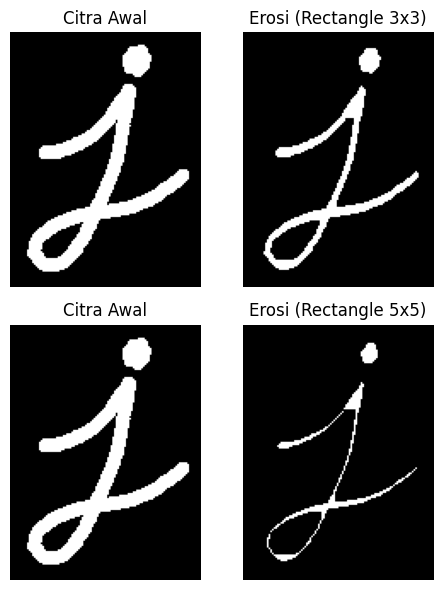

In [17]:
imge = cv2.imread('/content/drive/MyDrive/Kuliah polinema/sem 5/PCVK/Images/j.png', cv2.IMREAD_GRAYSCALE)

erode_3x5 = np.zeros(imge.shape, imge.dtype)
erode_5x7 = np.zeros(imge.shape, imge.dtype)

rectangle_3x5 = np.ones((3, 5), np.uint8)
rectangle_5x7 = np.ones((5, 7), np.uint8)

height, width = imge.shape

k_height_3x5, k_width_3x5 = rectangle_3x5.shape
border_height_3x5 = k_height_3x5 // 2
border_width_3x5 = k_width_3x5 // 2

for y in range(border_height_3x5, height - border_height_3x5):
    for x in range(border_width_3x5, width - border_width_3x5):
        roi = imge[y - border_height_3x5:y + border_height_3x5 + 1, x - border_width_3x5:x + border_width_3x5 + 1]
        erode_3x5[y, x] = np.min(roi & rectangle_3x5)

k_height_5x7, k_width_5x7 = rectangle_5x7.shape
border_height_5x7 = k_height_5x7 // 2
border_width_5x7 = k_width_5x7 // 2

for y in range(border_height_5x7, height - border_height_5x7):
    for x in range(border_width_5x7, width - border_width_5x7):
        roi = imge[y - border_height_5x7:y + border_height_5x7 + 1, x - border_width_5x7:x + border_width_5x7 + 1]
        erode_5x7[y, x] = np.min(roi & rectangle_5x7)

plt.figure(figsize=(5, 6))
plt.subplot(2, 2, 1)
plt.imshow(imge, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(erode_3x5, cmap='gray')
plt.title('Erosi (Rectangle 3x3)')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(imge, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(erode_5x7, cmap='gray')
plt.title('Erosi (Rectangle 5x5)')
plt.axis('off')

plt.tight_layout()
plt.show()

12. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Line Vertikal 3 dan 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan
gambar j.png)

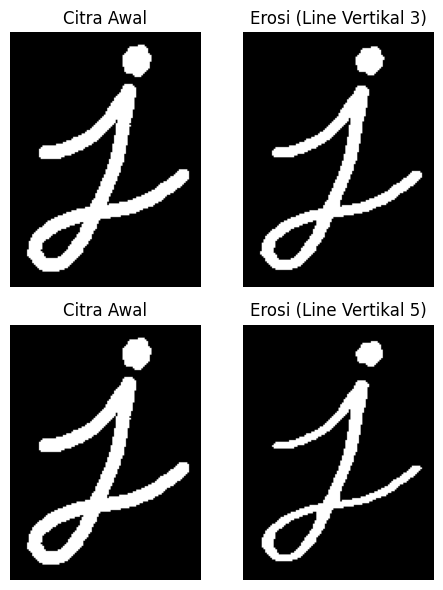

In [19]:
imag = cv2.imread('/content/drive/MyDrive/Kuliah polinema/sem 5/PCVK/Images/j.png', cv2.IMREAD_GRAYSCALE)

# Create vertical line structuring elements
kernel_3x1 = np.array([[1], [1], [1]], dtype=np.uint8)  # Vertical line 3x1
kernel_5x1 = np.array([[1], [1], [1], [1], [1]], dtype=np.uint8)  # Vertical line 5x1

# Perform erosion using OpenCV
eroded_3x1 = cv2.erode(imag, kernel_3x1)
eroded_5x1 = cv2.erode(imag, kernel_5x1)

plt.figure(figsize=(5, 6))
plt.subplot(2, 2, 1)
plt.imshow(imag, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(eroded_3x1, cmap='gray')
plt.title('Erosi (Line Vertikal 3)')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(imag, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(eroded_5x1, cmap='gray')
plt.title('Erosi (Line Vertikal 5)')
plt.axis('off')

plt.tight_layout()
plt.show()